<a href="https://colab.research.google.com/github/Eqania/Prediction-of-Differentiated-Thyroid-Cancer-Recurrence/blob/main/Prediction_of_Differentiated_Thyroid_Cancer_Recurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1). Mengumpulkan data

Dataset yang digunakan merupakan dataset tentang tyroid. Data ini terdiri dari 15 fitures dan 1 target dengan jumlah data 383 dari masing-masing kolom data.link sumber : https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence
   

#Load

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load dataset yang dibutuhkan
dataset=pd.read_csv("Thyroid_Diff.csv")

In [ ]:
#Masukan nama-nama features dari setiap kolom
#dataset.columns=['mcv','alkphos','sgpt','sgot','gammagt','drinks','selector']

#2) Menelaah Data

In [ ]:
#menampilkan 5 data teratas
dataset.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
#menampilkan 5 dataset terbawah
dataset.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
#menampilkan informasi dari setiap dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
#menampilkan perhitungan statistik  fyi (include='all') kalau mau nampilin semua data kategorikal
dataset.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


ket:
* Count: Jumlah nilai yang tidak kosong (non-NA/null).
* Mean: Rata-rata dari nilai.
* Std: Standar deviasi (mengukur seberapa jauh data tersebar dari rata-rata).
* Min: Nilai minimum.
* 25% (Q1): Kuartil pertama, 25% data berada di bawah nilai ini.
* 50% (Median): Kuartil kedua, 50% data berada di bawah nilai ini.
* 75% (Q3): Kuartil ketiga, 75% data berada di bawah nilai ini.
* Max: Nilai maksimum

#3) Menvalidasi data

In [ ]:
#Menampilkan jumlah duplicated dari setiap kolom
dataset.duplicated().sum()

19

In [ ]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [ ]:
unique_values={}
for col in dataset.columns:
  unique_counts=dataset[col].nunique()
  unique_values[col]=unique_counts
for col,count in unique_values.items():
  print(f"{col:<20} :{count:>5} ")

Age                  :   65 
Gender               :    2 
Smoking              :    2 
Hx Smoking           :    2 
Hx Radiothreapy      :    2 
Thyroid Function     :    5 
Physical Examination :    5 
Adenopathy           :    6 
Pathology            :    4 
Focality             :    2 
Risk                 :    3 
T                    :    7 
N                    :    3 
M                    :    2 
Stage                :    5 
Response             :    4 
Recurred             :    2 


In [ ]:
cat_cols=[col for col in dataset.columns if dataset[col].dtype=='object']
for col in cat_cols:
  print(f'{col} has {dataset[col].unique()} values ')

Gender has ['F' 'M'] values 
Smoking has ['No' 'Yes'] values 
Hx Smoking has ['No' 'Yes'] values 
Hx Radiothreapy has ['No' 'Yes'] values 
Thyroid Function has ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism'] values 
Physical Examination has ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter'] values 
Adenopathy has ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior'] values 
Pathology has ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell'] values 
Focality has ['Uni-Focal' 'Multi-Focal'] values 
Risk has ['Low' 'Intermediate' 'High'] values 
T has ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b'] values 
N has ['N0' 'N1b' 'N1a'] values 
M has ['M0' 'M1'] values 
Stage has ['I' 'II' 'IVB' 'III' 'IVA'] values 
Response has ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete'] values 
Recurred has ['No' 'Yes'] values 


#4) Menentukan object

In [ ]:
#Menghapus column yang tidak diperlukan data_drop=dataset.drop(columns=[''])

#Menampilkan informasi terkait data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
#Menampilkan statistik data
dataset.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


# 5) Membersihkan data

In [ ]:
#Menghapus data duplikat
dataclean=dataset.drop_duplicates()
dataclean[dataclean.duplicated(keep=False)]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred


In [ ]:
#Menghapus data missing value dan menggantinya dengan mode
dataclean=dataclean.fillna(dataclean.mode().iloc[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Mengubah tipe data
#dataclean['']=dataclean[''].astype='str'.astype='int64'
le= LabelEncoder()
for col in cat_cols:
  dataclean[col]=le.fit_transform(dataclean[col])

In [ ]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   364 non-null    int64
 1   Gender                364 non-null    int64
 2   Smoking               364 non-null    int64
 3   Hx Smoking            364 non-null    int64
 4   Hx Radiothreapy       364 non-null    int64
 5   Thyroid Function      364 non-null    int64
 6   Physical Examination  364 non-null    int64
 7   Adenopathy            364 non-null    int64
 8   Pathology             364 non-null    int64
 9   Focality              364 non-null    int64
 10  Risk                  364 non-null    int64
 11  T                     364 non-null    int64
 12  N                     364 non-null    int64
 13  M                     364 non-null    int64
 14  Stage                 364 non-null    int64
 15  Response              364 non-null    int64
 16  Recurred     

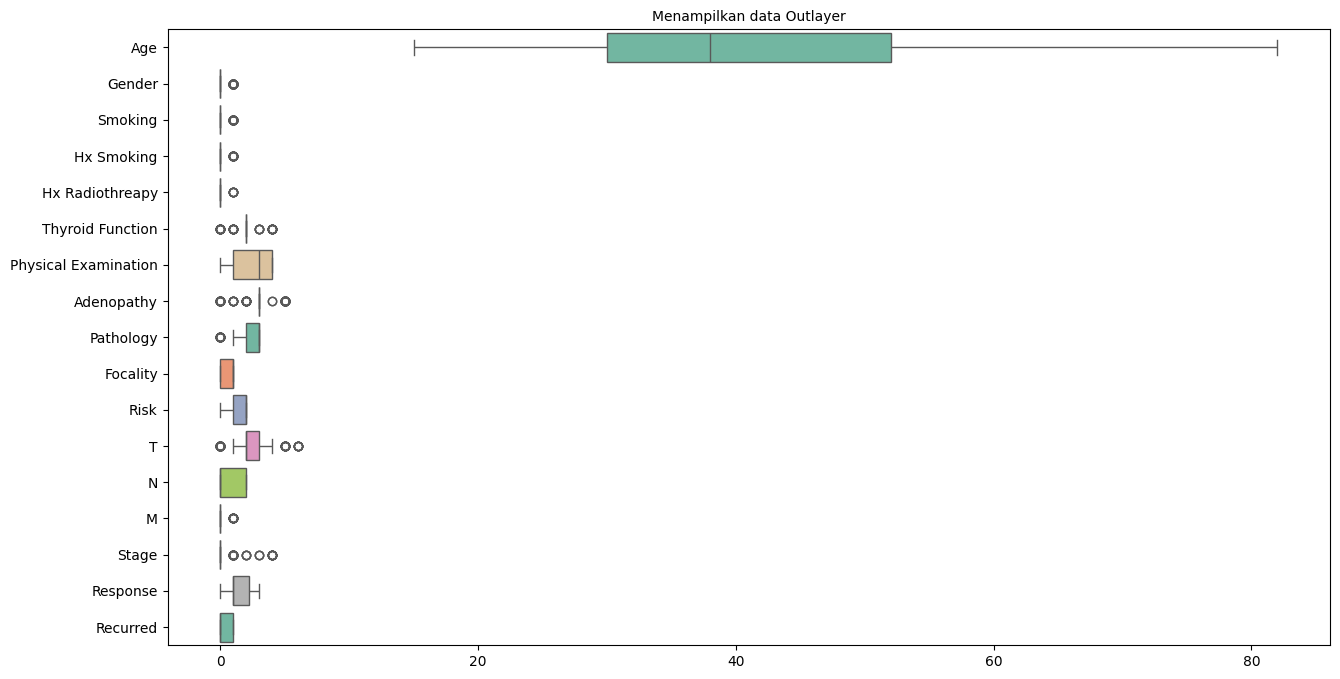

In [ ]:
#Menampilkan visualisasi untuk outlayer
plt.figure(figsize=(15,8))
sns.boxplot(data=dataclean, orient='h', palette='Set2')
plt.title("Menampilkan data Outlayer",fontsize=10)
plt.show()

data_iqr=dataclean.copy()
for col in dataclean.select_dtypes(include=['int64','float']):
  if col not in ['Age','Focality','N','Response','Recurred']:
    Q1=dataclean[col].quantile(0.25)
    Q3=dataclean[col].quantile(0.75)
    IQR=Q1-Q3
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data_iqr[col]=dataclean[col].apply(lambda x:lower_bound if x <lower_bound else( upper_bound if x > upper_bound  else x))
    print(f"Outlayer pada {col} sudah ditangani dengan IQR")
  

In [ ]:
data_iqr=dataclean.copy()
for col in dataclean.select_dtypes(include=['int64','float']):
  if col not in ['Age','Focality','N','Response','Recurred']:
    Q1=dataclean[col].quantile(0.25)
    Q3=dataclean[col].quantile(0.75)
    IQR=Q1-Q3
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data_iqr[col]=dataclean[col].apply(lambda x:lower_bound if x <lower_bound else( upper_bound if x > upper_bound  else x))
    print(f"Outlayer pada {col} sudah ditangani dengan IQR")

Outlayer pada Gender sudah ditangani dengan IQR
Outlayer pada Smoking sudah ditangani dengan IQR
Outlayer pada Hx Smoking sudah ditangani dengan IQR
Outlayer pada Hx Radiothreapy sudah ditangani dengan IQR
Outlayer pada Thyroid Function sudah ditangani dengan IQR
Outlayer pada Physical Examination sudah ditangani dengan IQR
Outlayer pada Adenopathy sudah ditangani dengan IQR
Outlayer pada Pathology sudah ditangani dengan IQR
Outlayer pada Risk sudah ditangani dengan IQR
Outlayer pada T sudah ditangani dengan IQR
Outlayer pada M sudah ditangani dengan IQR
Outlayer pada Stage sudah ditangani dengan IQR


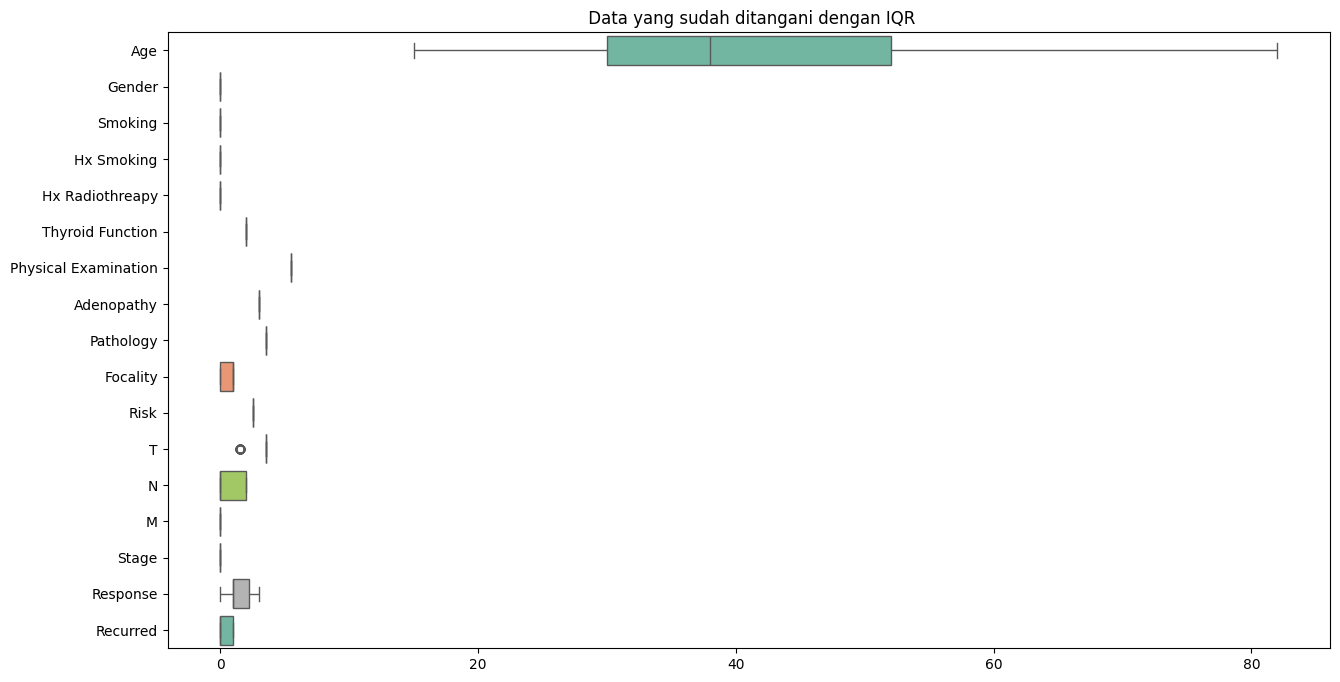

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_iqr, orient='h', palette='Set2')
plt.title(" Data yang sudah ditangani dengan IQR")
plt.show()

#6) Mengkontruksi data

In [ ]:
#Menampilkan data info setelah dilakukan iqr
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   364 non-null    int64
 1   Gender                364 non-null    int64
 2   Smoking               364 non-null    int64
 3   Hx Smoking            364 non-null    int64
 4   Hx Radiothreapy       364 non-null    int64
 5   Thyroid Function      364 non-null    int64
 6   Physical Examination  364 non-null    int64
 7   Adenopathy            364 non-null    int64
 8   Pathology             364 non-null    int64
 9   Focality              364 non-null    int64
 10  Risk                  364 non-null    int64
 11  T                     364 non-null    int64
 12  N                     364 non-null    int64
 13  M                     364 non-null    int64
 14  Stage                 364 non-null    int64
 15  Response              364 non-null    int64
 16  Recurred     

In [ ]:
dataclean.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


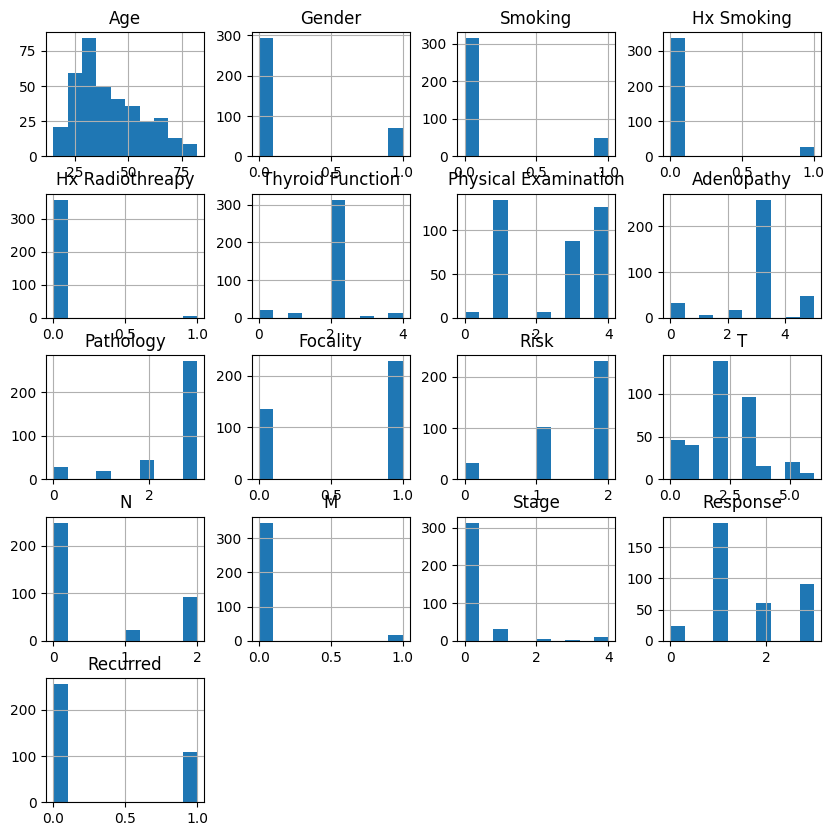

In [ ]:
data_his=dataclean.hist(figsize=(10,10))

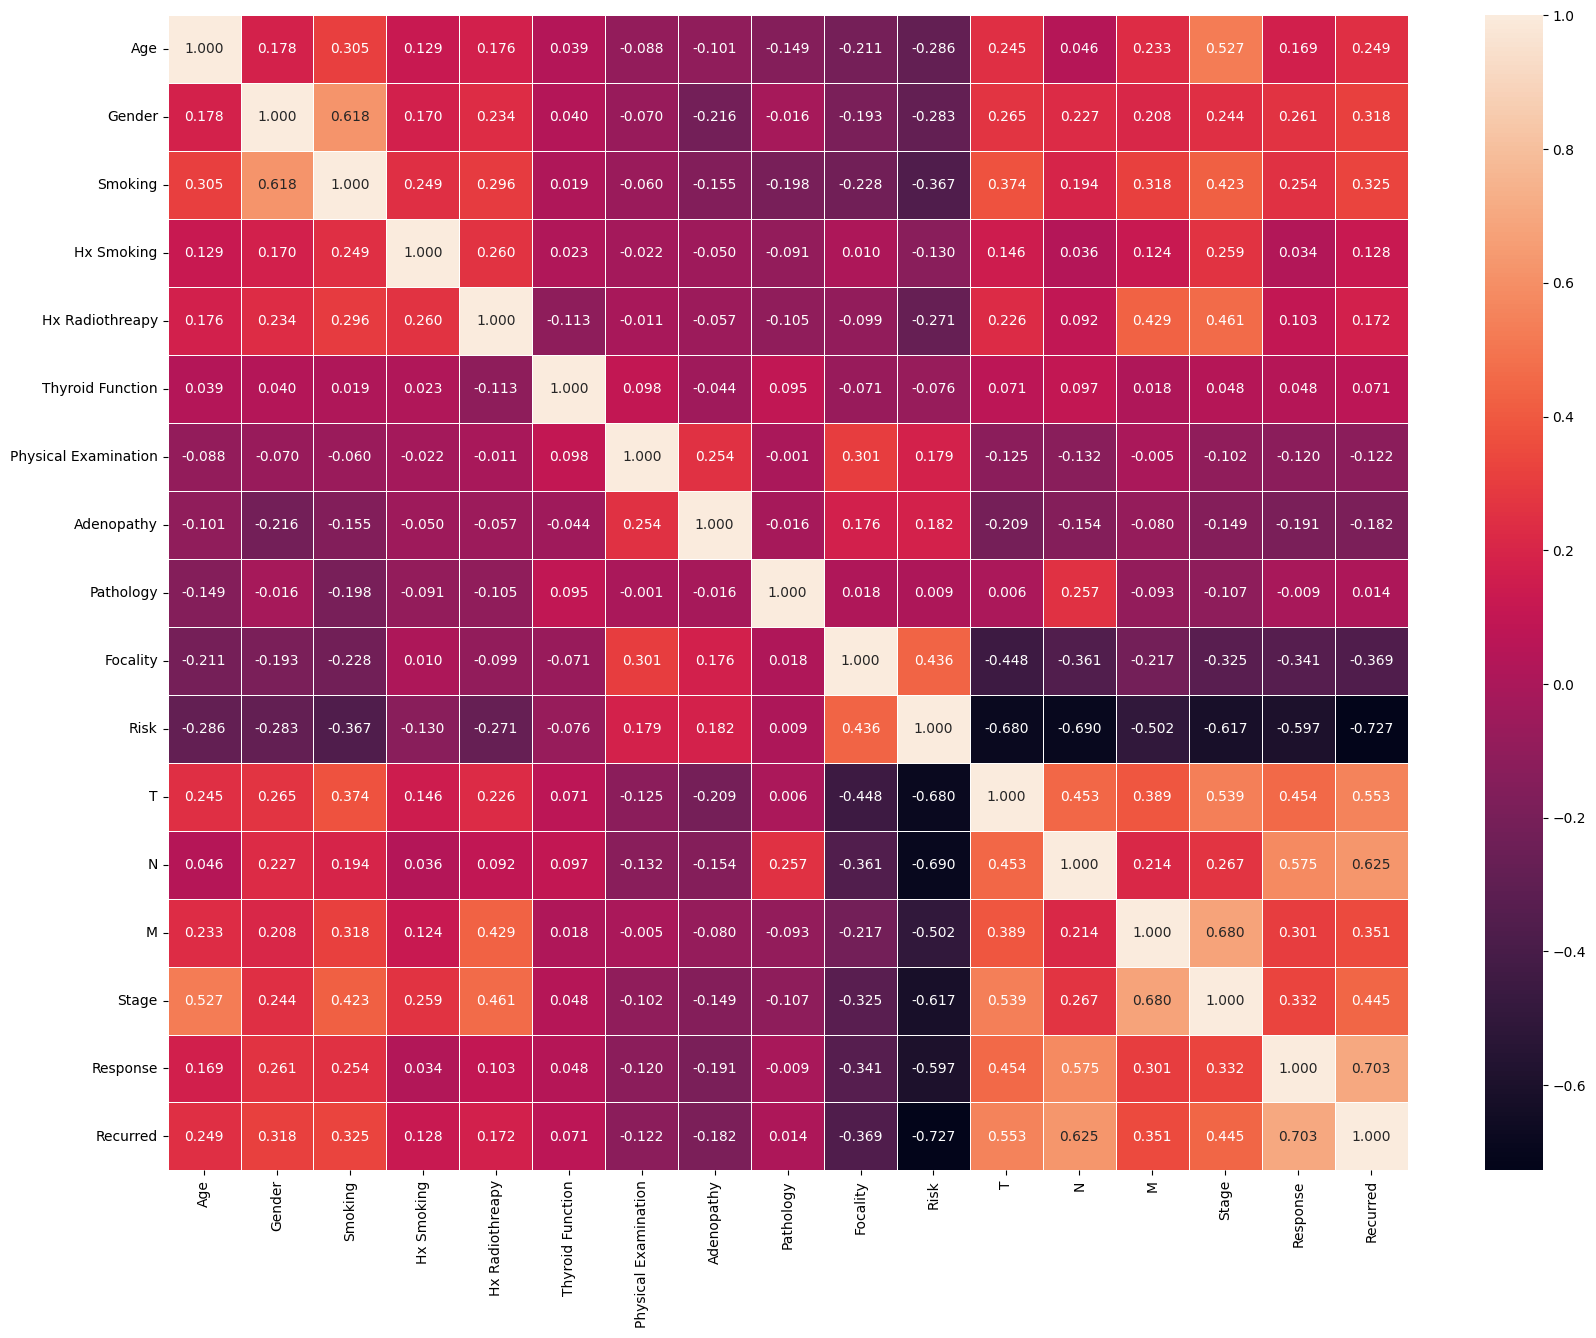

In [ ]:
#Menampilkan heatmap untuk melihat distribusi korelasi antar fatures
cor_map=dataclean.corr()
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(cor_map, fmt='.3f',linewidths=0.5,annot=True)
plt.show()

# 7) Mentukan Label

In [ ]:
X=dataclean.drop('Recurred',axis=1)
y=dataclean['Recurred']

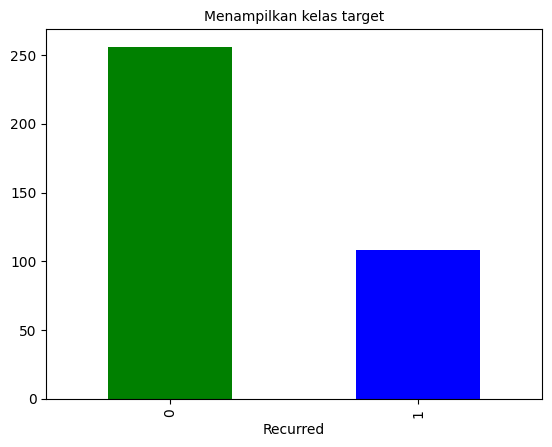

In [ ]:
dataclean['Recurred'].value_counts().plot(kind='bar', color=['green','Blue'])
plt.title('Menampilkan kelas target', fontsize=10)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote= SMOTE(random_state=42)
x_smote,y_smote =smote.fit_resample(X,y)

Text(0.5, 1.0, ' Menampilkan kelas target After smote')

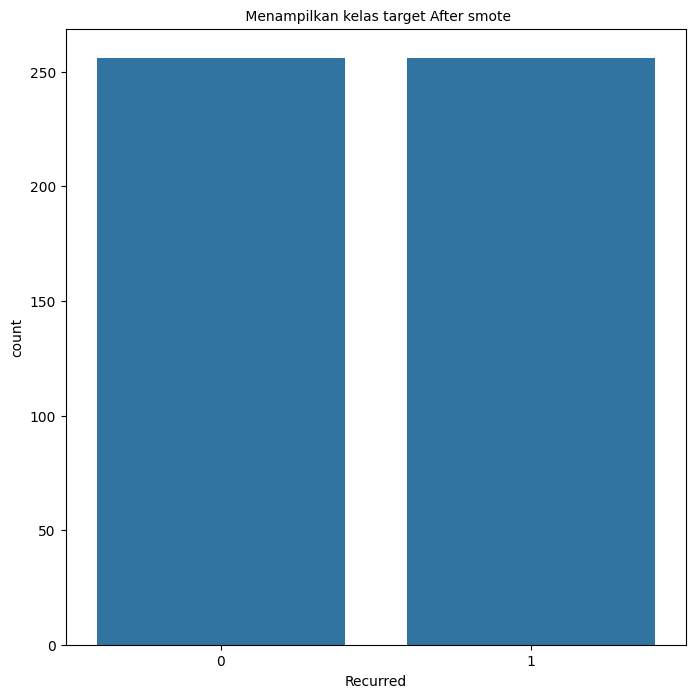

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x=y_smote)
plt.title(" Menampilkan kelas target After smote", fontsize=10)

In [ ]:
from sklearn.model_selection import train_test_split

#Model selection dengan menggunakan train test split
X_train,X_test,y_train,y_test= train_test_split(x_smote,y_smote, test_size=0.2,random_state=42, stratify=y_smote)

# 8) Membangun Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

#9) Mengevaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_pred_dt=dt.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred_dt))
print("Laporan Klasifikasi")
print(classification_report(y_test,y_pred_dt))

Accuracy Score:  0.9029126213592233
Laporan Klasifikasi
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        52
           1       0.87      0.94      0.91        51

    accuracy                           0.90       103
   macro avg       0.91      0.90      0.90       103
weighted avg       0.91      0.90      0.90       103



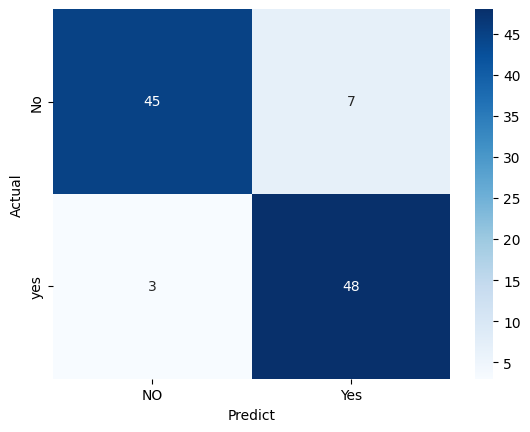

In [ ]:
cm_dt=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d',cmap='Blues', xticklabels=['NO','Yes'], yticklabels=['No','yes'])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_rf=rf.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred_rf))
print("Laporan Klasifikasi dari Random Forest")
print(classification_report(y_test,y_pred_rf))

Accuracy score:  0.941747572815534
Laporan Klasifikasi dari Random Forest
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.92      0.96      0.94        51

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



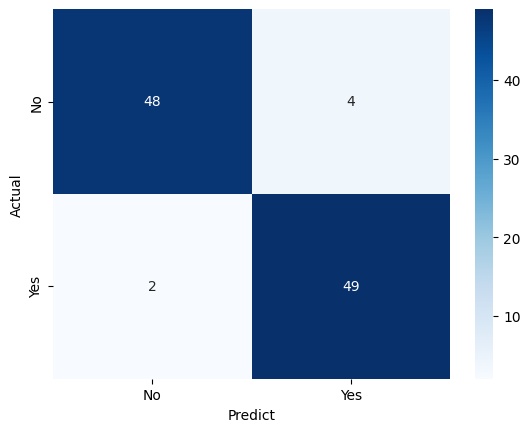

In [ ]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Blues',xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_lr =lr.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred_lr))
print("Laporan Klasifikasi Logistic Regresion")
print(classification_report(y_test,y_pred_lr))

Accuracy score:  0.8349514563106796
Laporan Klasifikasi Logistic Regresion
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        52
           1       0.81      0.86      0.84        51

    accuracy                           0.83       103
   macro avg       0.84      0.84      0.83       103
weighted avg       0.84      0.83      0.83       103



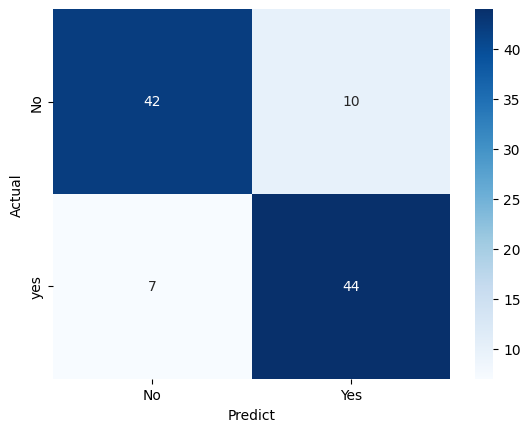

In [ ]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='Blues', xticklabels=['No','Yes'],yticklabels=['No','yes'])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_nb=nb.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred_nb))
print("Hasil Laporan klasifikasi Naive Bayes")
print(classification_report(y_test,y_pred_nb))

Accuracy score:  0.7864077669902912
Hasil Laporan klasifikasi Naive Bayes
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        52
           1       0.87      0.67      0.76        51

    accuracy                           0.79       103
   macro avg       0.80      0.79      0.78       103
weighted avg       0.80      0.79      0.78       103



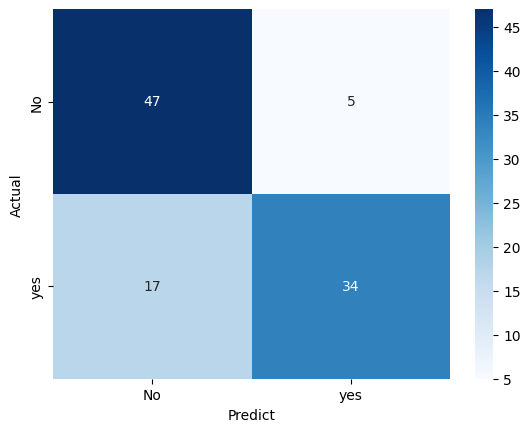

In [ ]:
cm_nb=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt='d', xticklabels=['No','yes'], yticklabels=['No','yes'])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
model_names=['Decison Tree','Random Forest','Logistic Regression','Naive Bayes']
accuracies=[
            accuracy_score(y_test,y_pred_dt),
            accuracy_score(y_test,y_pred_rf),
            accuracy_score(y_test,y_pred_lr),
            accuracy_score(y_test,y_pred_nb)
]

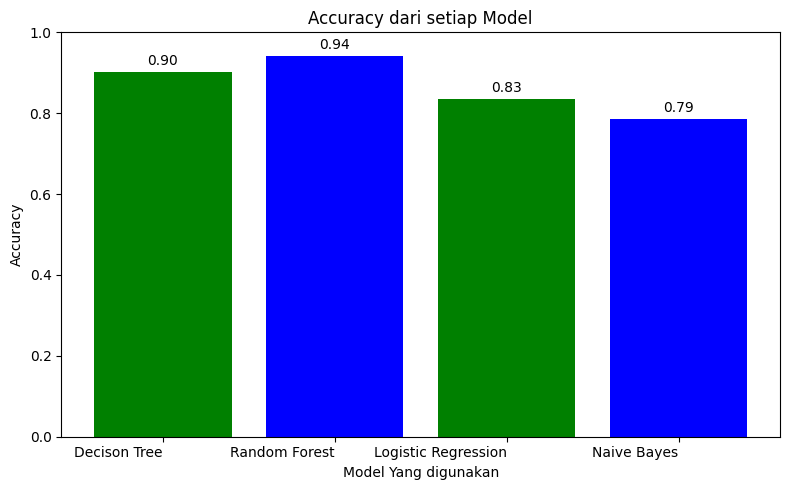

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(model_names,accuracies,color=['green','Blue'])
plt.xlabel("Model Yang digunakan")
plt.ylabel("Accuracy")
plt.title("Accuracy dari setiap Model")
plt.xticks(rotation=0, ha='right')
plt.ylim(0,1)

for i, v in enumerate(accuracies):
  plt.text(i,v+0.01, f'{v:.2f}',ha='center', va='bottom')

plt.tight_layout()
plt.show()